In [11]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

In [3]:
def matrix_similarity(A, B):
    # Compute singular values
    singular_A = np.linalg.svd(A, compute_uv=False)
    singular_B = np.linalg.svd(B, compute_uv=False)
    sv_diff = np.linalg.norm(singular_A - singular_B, ord=2)  # Spectral norm difference
    
    # Compute singular vector alignment
    U_A, _, _ = np.linalg.svd(A)
    U_B, _, _ = np.linalg.svd(B)
    alignment = np.linalg.norm(U_A.T @ U_B, ord='fro')
    
    # Compute Frobenius norm difference
    frobenius_norm = np.linalg.norm(A - B, 'fro')
    
    # Compute Pearson correlation
    corr, _ = pearsonr(A.flatten(), B.flatten())
    
    # Compute condition numbers
    cond_A = np.linalg.cond(A)
    cond_B = np.linalg.cond(B)
    cond_ratio = cond_A / cond_B if cond_B != 0 else np.inf
    
    return {
        "Singular Value Difference (Spectral Norm)": sv_diff,
        "Singular Vector Alignment": alignment,
        "Frobenius Norm Difference": frobenius_norm,
        "Matrix Pearson Correlation": corr,
        # "Condition Number A": cond_A,
        # "Condition Number B": cond_B,
        "Condition Number Ratio": cond_ratio
    }

In [4]:
# Example usage
A = np.random.rand(5, 5)
B = A + np.random.normal(scale=0.1, size=A.shape)  # Slightly modified version of A

similarity_scores = matrix_similarity(A, B)
for key, value in similarity_scores.items():
    print(f"{key}: {value}")

Singular Value Difference (Spectral Norm): 0.16241220014098423
Singular Vector Alignment: 2.2360679774997902
Frobenius Norm Difference: 0.49524117953774355
Matrix Pearson Correlation: 0.9418218208814859
Condition Number Ratio: 2.220859191209864


In [42]:
num_generate = 50
mean_th_list = np.arange(0, 5000 + 10, 10)/1000

help_list = []
for scale_th in mean_th_list:
    for i_th in range(num_generate):
        
        help_dict = {
            "scale_th": scale_th,
            "i_th": i_th
        }
        
        A = np.random.rand(100, 5)
        B = A + np.random.normal(scale=scale_th, size=A.shape)

        similarity_scores = matrix_similarity(A, B)
        
        help_dict.update(similarity_scores)
        help_list.append(help_dict)
        
df_stats = pd.DataFrame(help_list)

In [43]:
cols_to_gb = [
    "Singular Value Difference (Spectral Norm)", 
    "Singular Vector Alignment", 
    "Frobenius Norm Difference", 
    "Matrix Pearson Correlation", 
    "Condition Number Ratio"
]

help_list = []
for g, df_g in df_stats.groupby("scale_th"):
    help_dict = df_g[cols_to_gb].mean().to_dict()
    mean_help_dict = {"Mean " + k: v for k, v in help_dict.items()}
    
    help_dict = df_g[cols_to_gb].std().to_dict()
    std_help_dict = {"STD " + k: v for k, v in help_dict.items()}
    
    help_dict = {"scale_th": g}
    
    help_dict.update(mean_help_dict)
    help_dict.update(std_help_dict)
    
    help_list.append(help_dict)
    
df_summary_stats = pd.DataFrame(help_list)

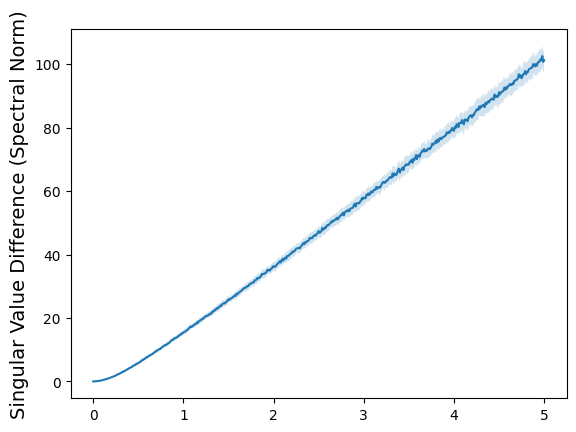

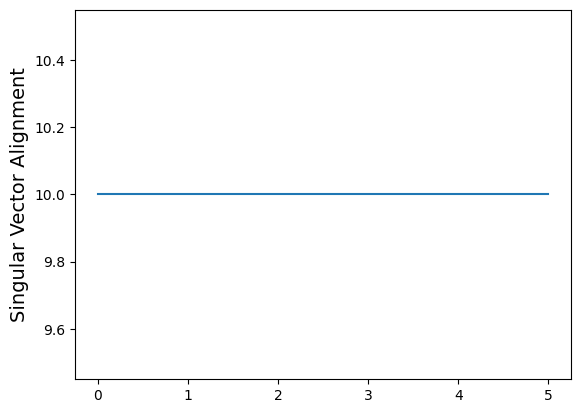

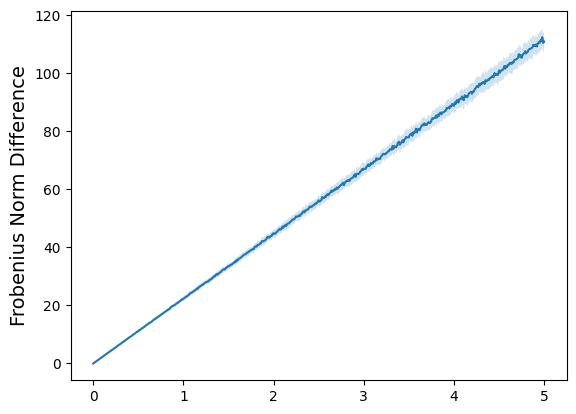

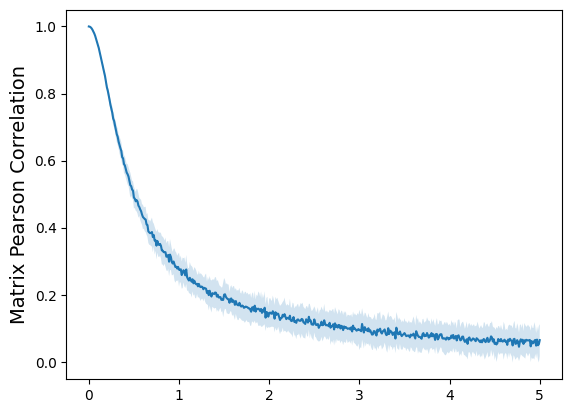

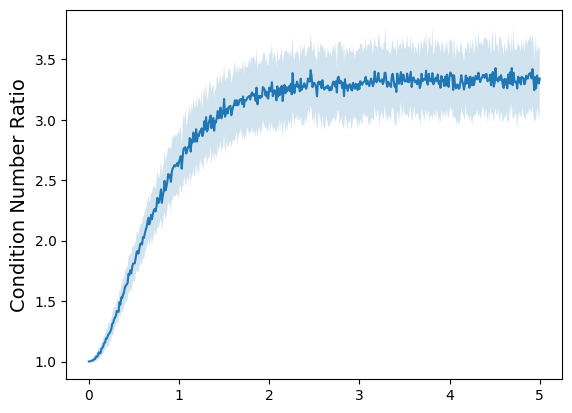

: 

In [44]:
for col in cols_to_gb:

    plt.plot(df_summary_stats["scale_th"], df_summary_stats[f"Mean {col}"])
    plt.fill_between(df_summary_stats["scale_th"], 
                     # df_summary_stats[f"Mean {col}"], 
                     df_summary_stats[f"Mean {col}"] - df_summary_stats[f"STD {col}"], 
                     df_summary_stats[f"Mean {col}"] + df_summary_stats[f"STD {col}"], 
                     alpha=0.2)
    
    plt.ylabel(col, fontsize=14)
    
    plt.show()